### CT SCAN Image Exploratory Analysis and Contrast Classifier Model building


### Table of Contents:
### [1. Problem Statement ](#problem)
### [2. About  datasets](#dataset)
### [3. What is CT Scan ?](#ctscan)
### [4. How CT Scan Works ?](#how)
### [5. Use of a tool for viewing medical images](#tools)
### [6. Exploratory Analysis ](#eda)
### [7. Conclusion](#conclusion)
### [8. Reference](#ref)



<a id='problem'></a>
### 1.Problem Statement

Based on a sample set of CT Scan Images ( with Contrast value as label), a model need to be prepared which can predict Contrast value of a new CT Scan Image.
  This problem has been approached in two parts:
  1. First Source data sets has been explored to find more insights  , those are are captured in a Jupyter Notebook file in this repository ( ".....this file")

  2. Secondly A CNN image classifier model has been created based on understandinng from EDA analysis. Find another Jupyter Notebook file for this in this repository ("....Classification.ipnyb")



<a id='dataset'></a>
### 2. About  dataset
For this study, pulmonary adenocarcinoma tests, publicly available on The Cancer Imaging Archive (TCIA), were used. This image dataset is heterogeneous in terms of scanner modalities, manufacturers and acquisition protocols. In most cases, images were acquired as part of routine care rather than as part of a controlled research study or clinical trial (Albertina, Watson, Holback, et al, 2016).

The images used in this study are chest (chest) and lung (lung) images.

Please find more about the dataset from this Kaggle link. (https://www.kaggle.com/kmader/siim-medical-images)

<a id='ctscan'></a>
### 3. What Is a CT Scan?

A computed tomography (CT or CAT) scan allows doctors to see inside your body. It uses a combination of X-rays and a computer to create pictures of your organs, bones, and other tissues. It shows more detail than a regular X-ray.

You can get a CT scan on any part of your body. The procedure doesn't take very long, and it's painless.





<a id='how'></a>
### 4. How Do CT Scans Work?
They use a narrow X-ray beam that circles around one part of your body. This provides a series of images from many different angles. A computer uses this information to create a cross-sectional picture. Like one piece in a loaf of bread, this two-dimensional (2D) scan shows a “slice” of the inside of your body.

This process is repeated to produce a number of slices. The computer stacks these scans one on top of the other to create a detailed image of your organs, bones, or blood vessels. For example, a surgeon may use this type of scan to look at all sides of a tumor to prepare for an operation.

<img src="https://images.unsplash.com/photo-1581595219315-a187dd40c322?ixid=MnwxMjA3fDB8MHxjb2xsZWN0aW9uLXBhZ2V8NXw3NTM3MTIwMHx8ZW58MHx8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60"/>

                              Source of Image : Unsplash by National Cancer Institute

In [1]:
### Importing required python librarirs:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
%matplotlib inline

from glob import glob
import pydicom # View dicom Image
from skimage.io import imread # to view tiff image
import os # accessing directory structure
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore") ### Warning removal 



<a id='tools'></a>
### 5. Use of a tool for viewing medical images
A specialized viewer is generally required to view CT scan images. Here is an attempt to view and analyze those images inside jupyter notebook using applicable python packages.

What we'll see in this article:

[ ] Get data and store it for later analysis

[ ] View dicom images using Python language, on a jupyter notebook, which does not need to be installed and runs in any browser.

[ ] Get and organize image metadata in a data frame

[ ] Analyze the images


In [2]:
print(os.listdir('......./siim_images/'))


['CT_IMAGE_CLASSIFICATION.ipynb', 'tiff_images', '.DS_Store', 'dicom_dir', 'overview.csv', 'Readme_Content.md', 'full_archive.npz', '.ipynb_checkpoints', 'CT_SCAN_IMAGE_EDA_Analysis.ipynb']


There are 4 inputs from above dataset link.  2 directories: 'tiff_images','dicom_dir' and 1 csv file :'overview.csv' and a 'full_archive.npz' file.

<a id='eda'></a>
### 6. Exploratory Analysis

Let's check the overview csv input file first

In [3]:
nRows2read = 1000 # specify 'None' if want to read whole file
# overview.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/Users/apple/Downloads/archive/overview.csv', delimiter=',', nrows = nRows2read)
df1.dataframeName = 'overview.csv'
Rownum, Colnum = df1.shape
print(f'There are {Rownum} rows and {Colnum} columns')



There are 100 rows and 8 columns


In [4]:
df1.head(5) #First 5 Rows in the Overview file.


,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


#### Distribution graphs (histogram/bar graph) of sampled columns:

In [5]:
sns.set_style('whitegrid')



Text(0, 0.5, 'Counts')

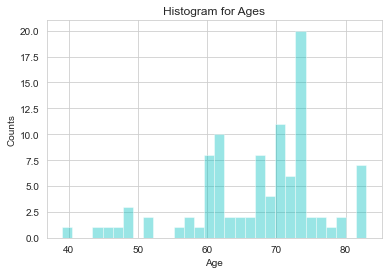

In [6]:

sns.distplot(df1['Age'],bins = 30,kde=False,color = 'c',hist= True)
plt.title('Histogram for Ages')
plt.ylabel('Counts')



Text(0.5, 1.0, 'Barplot for Contrast')

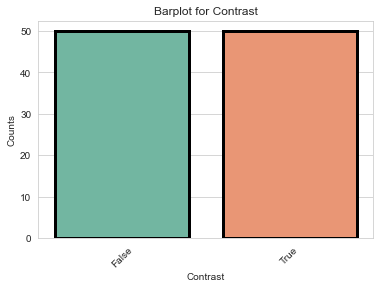

In [7]:
sns.countplot(x="Contrast", data=df1,linewidth=3,edgecolor='black',palette='Set2') 
plt.xticks(rotation=45)
plt.xlabel("Contrast")
plt.ylabel('Counts')
plt.title('Barplot for Contrast')


Text(0.5, 1.0, 'Barplot for ContrastTag')

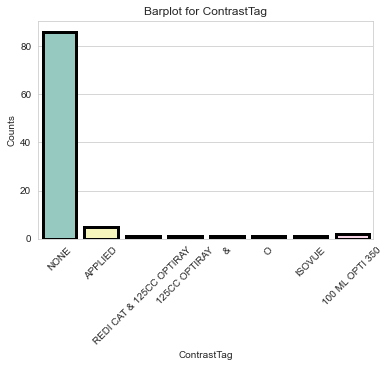

In [8]:
sns.countplot(x="ContrastTag", data=df1,linewidth=3,edgecolor='black',palette='Set3') 
plt.xticks(rotation=45)
plt.xlabel("ContrastTag")
plt.ylabel('Counts')
plt.title('Barplot for ContrastTag')
 

#### Let's explore tiff images as in source dataset tiff images directory:

In [9]:
PATH = '.../siim_images'
path_tiff ='...../siim_images/tiff_images' ### Local path for Dicom Image directory

image_list = os.listdir(path_tiff)

print(f'From total  {len(image_list)}  of tiff images,',
      f'\nExample of few listed images are as below:\n{image_list[0:10]}')

From total  100  of tiff images, 
Example of few listed images are as below:
['ID_0084_AGE_0067_CONTRAST_0_CT.tif', 'ID_0088_AGE_0067_CONTRAST_0_CT.tif', 'ID_0020_AGE_0066_CONTRAST_1_CT.tif', 'ID_0039_AGE_0074_CONTRAST_1_CT.tif', 'ID_0004_AGE_0056_CONTRAST_1_CT.tif', 'ID_0086_AGE_0073_CONTRAST_0_CT.tif', 'ID_0083_AGE_0082_CONTRAST_0_CT.tif', 'ID_0061_AGE_0074_CONTRAST_0_CT.tif', 'ID_0078_AGE_0066_CONTRAST_0_CT.tif', 'ID_0087_AGE_0044_CONTRAST_0_CT.tif']


In [10]:
tiff_data = pd.DataFrame([{'path_tiff': filepath} for filepath in glob(PATH+'/tiff_images/*.tif')])
tiff_data

,path_tiff
0,/Users/apple/Downloads/archive/tiff_images/ID_...
1,/Users/apple/Downloads/archive/tiff_images/ID_...
2,/Users/apple/Downloads/archive/tiff_images/ID_...
3,/Users/apple/Downloads/archive/tiff_images/ID_...
4,/Users/apple/Downloads/archive/tiff_images/ID_...
...,...
95,/Users/apple/Downloads/archive/tiff_images/ID_...
96,/Users/apple/Downloads/archive/tiff_images/ID_...
97,/Users/apple/Downloads/archive/tiff_images/ID_...
98,/Users/apple/Downloads/archive/tiff_images/ID_...


In [11]:
def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+path)])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [12]:
tiff_data = process_data('/tiff_images/*.tif')
tiff_data.head(10)


,path,file,ID,Age,Contrast,Modality
0,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0084_AGE_0067_CONTRAST_0_CT.tif,0084,67,False,CT
1,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0088_AGE_0067_CONTRAST_0_CT.tif,0088,67,False,CT
2,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0020_AGE_0066_CONTRAST_1_CT.tif,0020,66,True,CT
3,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0039_AGE_0074_CONTRAST_1_CT.tif,0039,74,True,CT
4,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0004_AGE_0056_CONTRAST_1_CT.tif,0004,56,True,CT
5,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0086_AGE_0073_CONTRAST_0_CT.tif,0086,73,False,CT
6,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0083_AGE_0082_CONTRAST_0_CT.tif,0083,82,False,CT
7,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0061_AGE_0074_CONTRAST_0_CT.tif,0061,74,False,CT
8,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0078_AGE_0066_CONTRAST_0_CT.tif,0078,66,False,CT
9,/Users/apple/Downloads/archive/tiff_images/ID_...,ID_0087_AGE_0044_CONTRAST_0_CT.tif,0087,44,False,CT


#### Let's List out Dicom images in the dataset:


In [13]:
path ='/Users/apple/Downloads/archive/dicom_dir' ### Local path for Dicom Image directory

image_list = os.listdir(path)

print(f'From total  {len(image_list)}  of dicom images,',
      f'\nExample of few listed images are as below:\n{image_list[0:10]}')


From total  100  of dicom images, 
Example of few listed images are as below:
['ID_0062_AGE_0067_CONTRAST_0_CT.dcm', 'ID_0072_AGE_0060_CONTRAST_0_CT.dcm', 'ID_0041_AGE_0045_CONTRAST_1_CT.dcm', 'ID_0075_AGE_0080_CONTRAST_0_CT.dcm', 'ID_0052_AGE_0072_CONTRAST_0_CT.dcm', 'ID_0028_AGE_0074_CONTRAST_1_CT.dcm', 'ID_0070_AGE_0074_CONTRAST_0_CT.dcm', 'ID_0098_AGE_0061_CONTRAST_0_CT.dcm', 'ID_0009_AGE_0048_CONTRAST_1_CT.dcm', 'ID_0065_AGE_0082_CONTRAST_0_CT.dcm']


In [14]:
dicom_data = process_data('/dicom_dir/*.dcm')


In [15]:
dicom_data.head(10)

,path,file,ID,Age,Contrast,Modality
0,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0062_AGE_0067_CONTRAST_0_CT.dcm,0062,67,False,CT
1,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0072_AGE_0060_CONTRAST_0_CT.dcm,0072,60,False,CT
2,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0041_AGE_0045_CONTRAST_1_CT.dcm,0041,45,True,CT
3,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0075_AGE_0080_CONTRAST_0_CT.dcm,0075,80,False,CT
4,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0052_AGE_0072_CONTRAST_0_CT.dcm,0052,72,False,CT
5,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0028_AGE_0074_CONTRAST_1_CT.dcm,0028,74,True,CT
6,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0070_AGE_0074_CONTRAST_0_CT.dcm,0070,74,False,CT
7,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0098_AGE_0061_CONTRAST_0_CT.dcm,0098,61,False,CT
8,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0009_AGE_0048_CONTRAST_1_CT.dcm,0009,48,True,CT
9,/Users/apple/Downloads/archive/dicom_dir/ID_00...,ID_0065_AGE_0082_CONTRAST_0_CT.dcm,0065,82,False,CT


#### Check data consistency in between different file formats

In [16]:
def countplot_comparison(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 4))
    s1 = sns.countplot(df1[feature], ax=ax1)
    s1.set_title("Overview data")
    s2 = sns.countplot(tiff_data[feature], ax=ax2)
    s2.set_title("Tiff files data")
    s3 = sns.countplot(dicom_data[feature], ax=ax3)
    s3.set_title("Dicom files data")
    plt.show()

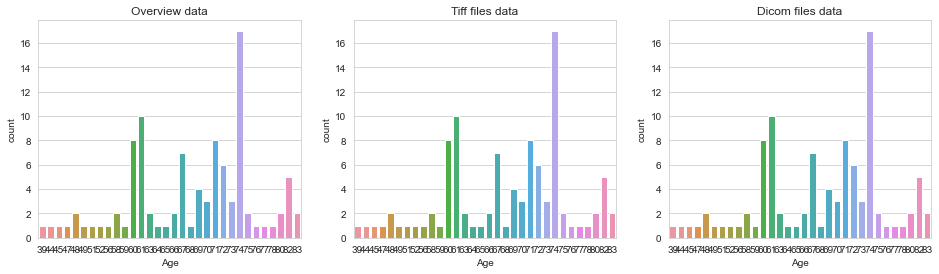

In [17]:
countplot_comparison('Age')

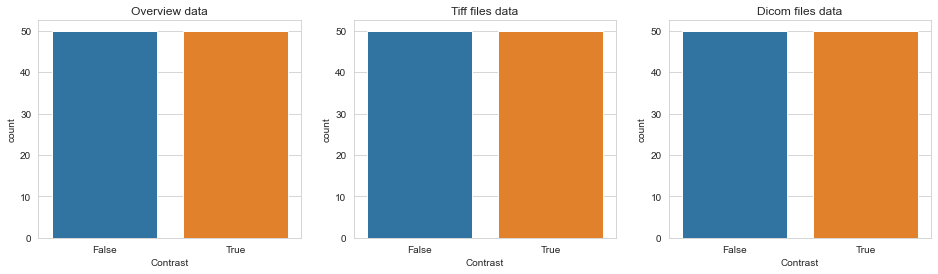

In [18]:
countplot_comparison('Contrast')

Data in different formats (csv, tiff anf dicom) represent similar pattern. Thus we can conclude all are in sync.

In [19]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        if(imtype=='TIFF'): 
            data_row_img = imread(data_row['path'])
        elif(imtype=='DICOM'):
            data_row_img = pydicom.read_file(data_row['path'])
        if(imtype=='TIFF'):
            ax[i//4, i%4].matshow(data_row_img,cmap='gray')
        elif(imtype=='DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()

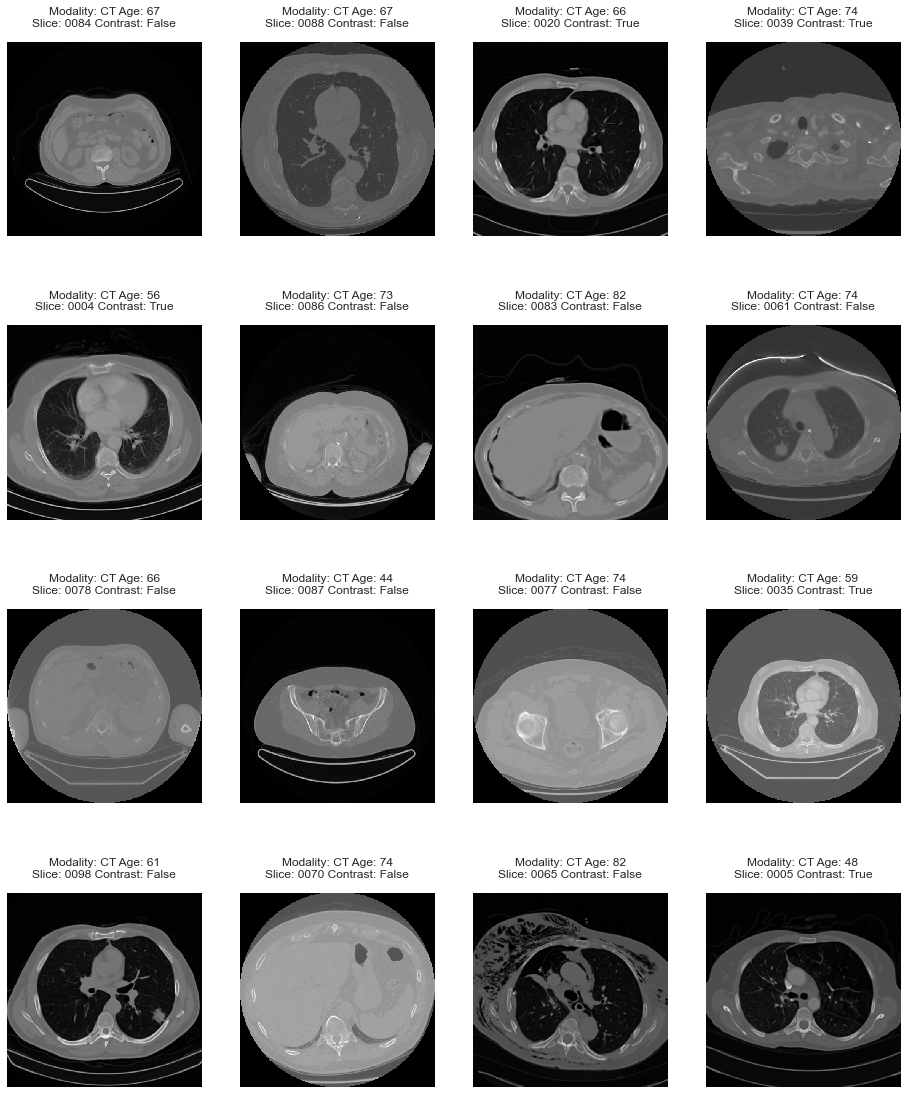

In [20]:
show_images(tiff_data,16,'TIFF')

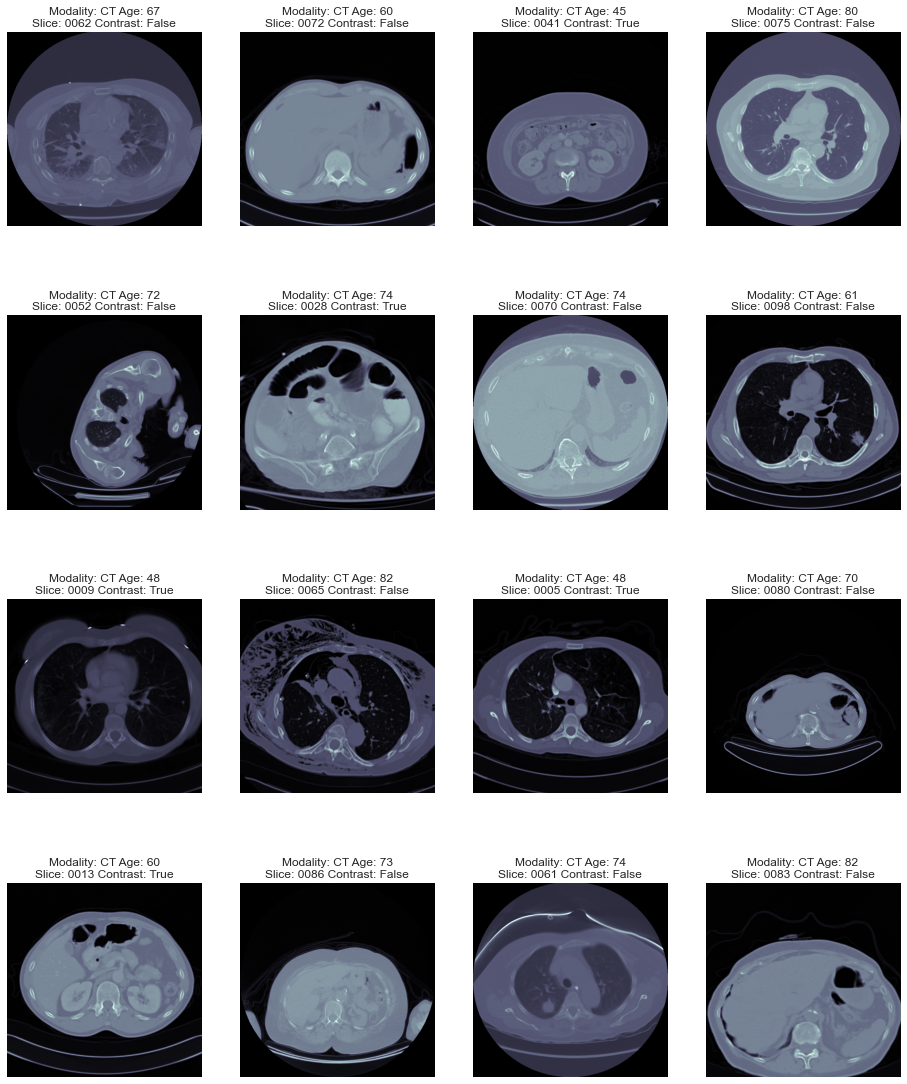

In [21]:
show_images(dicom_data,16,'DICOM')

In [22]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = pydicom.read_file(dicom_file_path)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6450.4012.266402896965029418188277260373
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19950131'
(0008, 0013) Instance Creation Time              TM: '091428'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Insta

We can extract various fields from the DICOM FileDataset.
Some of the information are anonymized (like Name and ID), which is common standard for public medical data.



<a id='conclusion'></a>
### 7. EDA Conclusion:

As a starting point we can consider either tiff images or dicom images to create our first contrast predicting CNN model for CT scan images.

<a id='ref'></a>
### 8. References:

[1] What is CT Scan and how it works : https://www.webmd.com/cancer/what-is-a-ct-scan . (Accessed on 10th Aug,2021)

[2] Dataset link : (https://www.kaggle.com/kmader/siim-medical-images).(Accessed on 15th Aug,2021)

[3] Kevin Mader, Show the data in the Zip File : https://www.kaggle.com/kmader/show-the-data-in-the-zip-file

[4] Vitaly Byrachonok, Study CT Medical Images : https://www.kaggle.com/byrachonok : (Accessed on 15th Aug,2021)

[5] Python package for processing DICOM data, dicom-numpy, https://dicom-numpy.readthedocs.io(Accessed on 15th Aug,2021)

[6] Viewing DICOM images in Python, https://pydicom.github.io/pydicom/stable/viewing_images.html (Accessed on 15th Aug,2021)

[7] Kaggle Notebook: https://www.kaggle.com/abhishektyagi001/ct-slim-medical-images/notebook#Data-exploration(Accessed on 15th Aug,2021)
